In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import simulation as sim
import analysis
from scipy.optimize import curve_fit

In [3]:
# Tijmen

beta_values = np.arange(0.5, 3, 0.1)

for beta_value in beta_values:
    analysis.try_gather_data_and_plot(state=sim.ordered_state(width=6),beta=beta_value,k=0,n=1,measurements=3000)

In [4]:
# Ties

beta_values = np.arange(3, 6, 0.1)

for beta_value in beta_values:
    analysis.try_gather_data_and_plot(state=sim.ordered_state(width=6),beta=beta_value,k=0,n=1,measurements=3000)

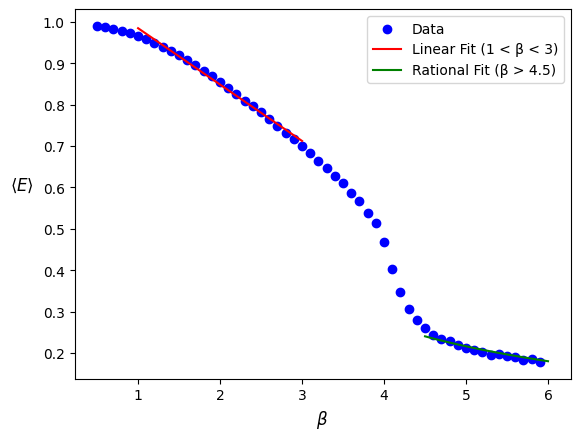

Linear Fit Parameters (1 < β < 3): [ 1.12088808 -0.13616051]
Rational Fit Parameter (β > 4.5): [0.92378248]


In [18]:
mean_actions = []

beta1s = np.arange(0.5, 3, 0.1)
with h5py.File('data/w6_actionbetas_part1.hdf5','r') as f:
    for beta1 in beta1s:
        actions = f[f"actions_w6_b{np.round(beta1,decimals=2)}"][()]
        mean_actions.append(np.mean(actions))

beta2s = np.arange(3, 6, 0.1)
with h5py.File('data/w6_actionbetas_part2.hdf5','r') as f:
    for beta2 in beta2s:
        actions = f[f"actions_w6_b{np.round(beta2,decimals=2)}"][()]
        mean_actions.append(np.mean(actions))

betas = np.concatenate([beta1s, beta2s])
mean_actions = np.array(mean_actions)

plt.scatter(betas, mean_actions, label='Data', color='blue')

def linear_fit(beta, a, b):
    return a + b * beta

def rational_fit(beta, c):
    return 1/(c * beta)

mask_linear = (betas > 1) & (betas < 3)
beta_linear = betas[mask_linear]
mean_actions_linear = mean_actions[mask_linear]

popt_linear, pcov_linear = curve_fit(linear_fit, beta_linear, mean_actions_linear)

beta_fit_linear = np.linspace(1, 3, 100)
mean_fit_linear = linear_fit(beta_fit_linear, *popt_linear)
plt.plot(beta_fit_linear, mean_fit_linear, label='Linear Fit (1 < β < 3)', color='red')

mask_rational = betas > 4.5
beta_rational = betas[mask_rational]
mean_actions_rational = mean_actions[mask_rational]

popt_rational, pcov_rational = curve_fit(rational_fit, beta_rational, mean_actions_rational)

beta_fit_rational = np.linspace(4.5, 6, 100)
mean_fit_rational = rational_fit(beta_fit_rational, *popt_rational)
plt.plot(beta_fit_rational, mean_fit_rational, label='Rational Fit (β > 4.5)', color='green')

plt.xlabel(r'$\beta$', fontsize=12)
plt.ylabel(r'$\langle E \rangle$', rotation=0, labelpad=15, fontsize=12)
plt.legend()
plt.show()

print("Linear Fit Parameters (1 < β < 3):", popt_linear)
print("Rational Fit Parameter (β > 4.5):", popt_rational)